In [1]:
from si import *

Welcome to JupyROOT 6.20/04
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/allcalos/results_run2c_x_vs_y_vs_time.root")
f.ls()

TFile**		./data/allcalos/results_run2c_x_vs_y_vs_time.root	
 TFile*		./data/allcalos/results_run2c_x_vs_y_vs_time.root	
  KEY: TDirectoryFile	clusters;1	clusters (CaloHitPositions) folder


In [3]:
calo = 13

randclusters = f.Get("clusters/randclustersX"+str(calo))

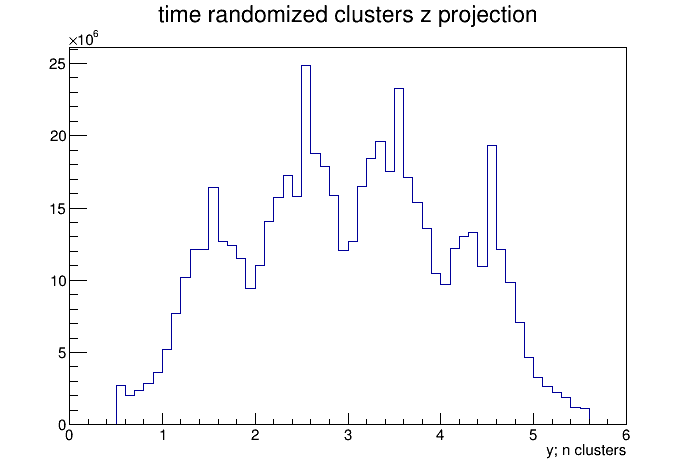

In [4]:
c = r.TCanvas()
randclusters.Project3D("z").Draw("colz")
c.Draw()

In [5]:
def fitfunc(choice, fitrange, params=None):
    tlow, thigh = fitrange
    if(choice is 0):
        func = r.TF1("func","[0] + [1] - [1]/(TMath::Exp([2]*x)) + [3]*(x)",tlow,thigh)
        func.SetParNames("C", "A", "#tau", "m")
        if(params is None):
            paramVec = [1,10,1,-0.0001,10]
        else:
            paramVec = params
        for i,xi in enumerate(paramVec):
            func.SetParameter(i,xi)
        return (func,paramVec)
    elif(choice is 1):
        func = r.TF1("func","pol1",tlow,thigh)
        func.SetParNames("C", "m")
        if(params is None):
            params = [1,-0.00001]
        for i,xi in enumerate(params):
            func.SetParameter(i,xi)
        return (func, params)
    else:
        print("Invalid choice")
        return -1

In [6]:
allFitResults = {}
allslopes = {}
allerrs = {}
allxs = {}
for calo in range(1,25):
    slopes = []
    slopeErrs = []
    xs = []
    print("Calo ", calo)
    #randclusters = f.Get("verticalPosition/randclusters"+str(calo)).Clone()
    randclusters = f.Get("clusters/randclustersX"+str(calo)).Clone()
    randclusters.Rebin3D(10,1,1)
    xwidth = 0.5
    for xi in [-1]+list(np.linspace(0,9,int(9/xwidth)+1)):
    #for xi in list(np.linspace(0,9,int(9/xwidth)+1)):
        if(xi < 0):
            randclusters.GetYaxis().UnZoom()
        else:
            randclusters.GetYaxis().SetRange(randclusters.GetYaxis().FindBin(xi),randclusters.GetYaxis().FindBin(xi+xwidth))
        widthDict = getWidths(randclusters.Project3D("zx"), scale=25, offset=3)

        tlow = 20
        thigh = 300

        func,paramVec = fitfunc(1, [tlow,thigh]) 

        fitresult = fitVector(widthDict['times'], widthDict['widths'], func, None, widthDict['widthErrs'])
        allFitResults["calo"+str(calo)+"_"+str(xi)] = fitresult
        slopes.append(fitresult.pars[1])
        slopeErrs.append(fitresult.parErrs[1])
        xs.append(xi + xwidth/2.0)
    allslopes[calo] = slopes
    allerrs[calo] = slopeErrs
    allxs[calo] = xs
    #break

Calo  1
Calo  2
Calo  3
Calo  4
Calo  5
Calo  6
Calo  7
Calo  8
Calo  9
Calo  10
Calo  11
Calo  12
Calo  13
Calo  14
Calo  15
Calo  16
Calo  17
Calo  18
Calo  19
Calo  20
Calo  21
Calo  22
Calo  23
Calo  24


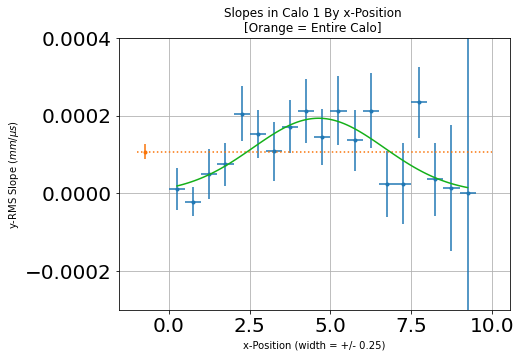

In [7]:
fig,ax = plt.subplots(figsize=(7,5))
calo=1
plt.errorbar( allxs[calo][1:], allslopes[calo][1:], xerr=xwidth/2, yerr=allerrs[calo][1:], fmt=".")
func = r.TF1("func","gaus",0,10)
fit = fitVector(allxs[calo][1:], allslopes[calo][1:], func ,
                xerr=[xwidth/2 for i in range(len(allxs[calo][1:]))], yerr=allerrs[calo][1:])
fit.drawFitResult(ax, color="xkcd:green")
plt.errorbar( allxs[calo][:1], allslopes[calo][:1], yerr=allerrs[calo][:1], fmt=".", color="xkcd:orange")
plt.grid()
plt.title("Slopes in Calo "+str(calo)+" By x-Position \n[Orange = Entire Calo] ")
plt.xlabel("x-Position (width = +/- "+str(xwidth/2)+")")
plt.ylabel(r"y-RMS Slope ($mm / \mu s$)")
plt.plot([-1,10], [allslopes[calo][0], allslopes[calo][0] ], ":", color="xkcd:orange")
plt.ylim(-0.0003,0.0004)
plt.show()

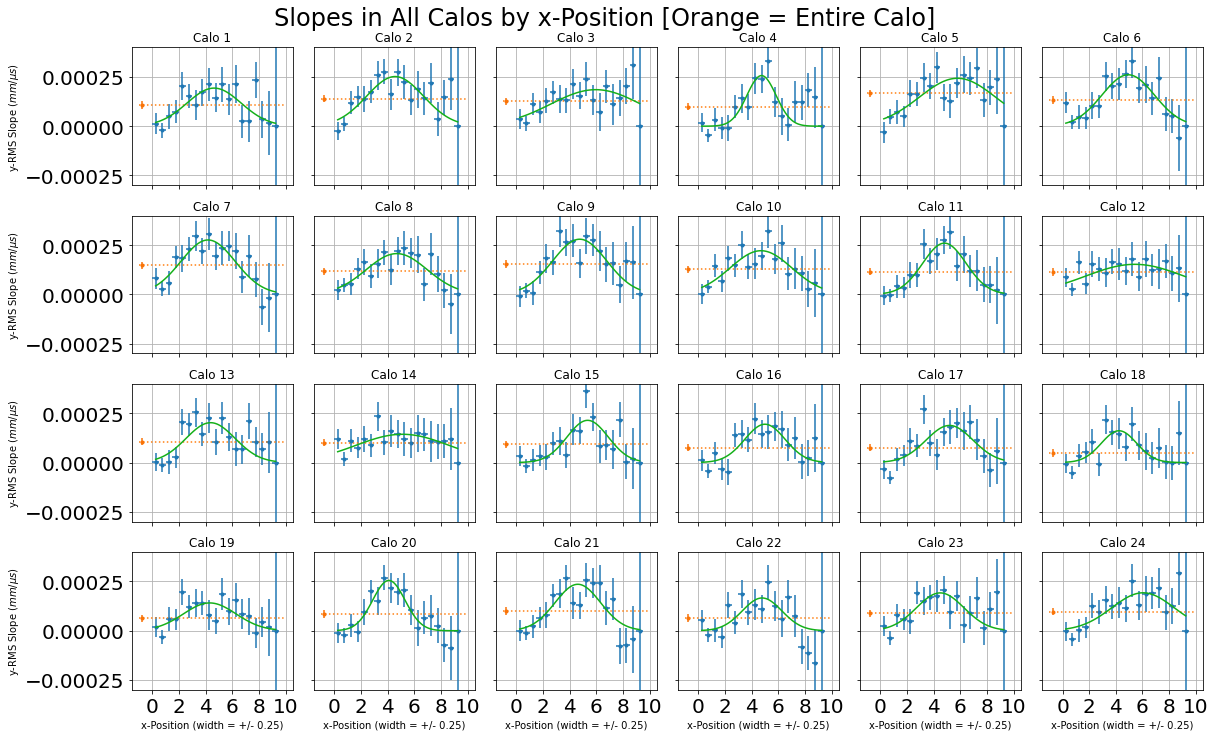

In [19]:
fig,ax = plt.subplots(4,6,figsize=(17,10), sharex=True, sharey=True)
doFit=True
ax = flatten2dArray(ax)
pars = []
parErrs = []
for calo in range(1,25):
    plt.sca(ax[calo-1])
    plt.errorbar( allxs[calo][1:], allslopes[calo][1:], xerr=xwidth/2, yerr=allerrs[calo][1:], fmt=".")
    if(doFit):
        func = r.TF1("func","gaus",0,10)
        fit = fitVector(allxs[calo][1:], allslopes[calo][1:], func ,
                        xerr=[xwidth/2 for i in range(len(allxs[calo][1:]))], yerr=allerrs[calo][1:])
        fit.drawFitResult(plt, color="xkcd:green")
        #print(fit.pars)
        pars.append(fit.pars)
        parErrs.append(fit.parErrs)
    plt.errorbar( allxs[calo][:1], allslopes[calo][:1], yerr=allerrs[calo][:1], fmt=".", color="xkcd:orange")
    plt.plot([-1,10], [allslopes[calo][0], allslopes[calo][0] ], ":")
    plt.grid()
    plt.title("Calo "+str(calo))
    if(calo % 6 == 1):
        plt.ylabel(r"y-RMS Slope ($mm / \mu s$)")
    if(calo > 18):
        plt.xlabel("x-Position (width = +/- "+str(xwidth/2)+")")


plt.suptitle("Slopes in All Calos by x-Position [Orange = Entire Calo] ", y=1.02, fontsize=24)
plt.ylim(-0.0003,0.0004)
plt.tight_layout()
plt.xticks([i for i in range(0,11,2)])
plt.show()

In [20]:
p0, p1, p2 = zip(*pars)
p0e, p1e, p2e = zip(*parErrs)

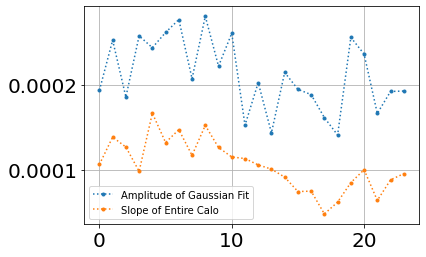

In [10]:
plt.plot(p0, ".:", label="Amplitude of Gaussian Fit")
plt.plot([allslopes[calo][0] for calo in range(1,25)], ".:", label="Slope of Entire Calo")
plt.grid()
plt.legend()
plt.show()

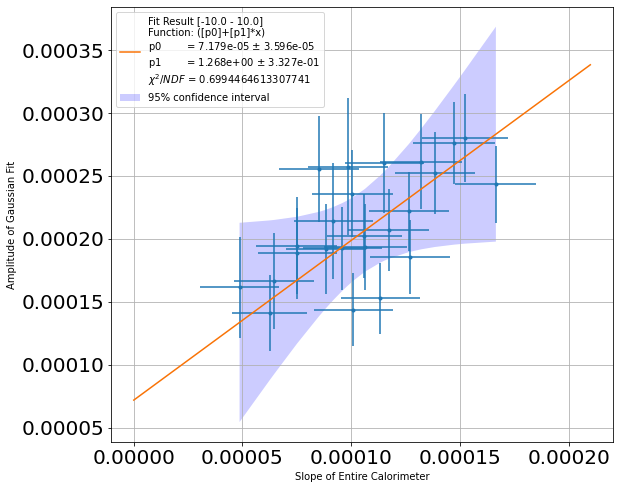

In [33]:
# plt.plot(p0, ".:", label="Amplitude of Gaussian Fit")
fig,ax = plt.subplots(figsize=(9,8))
plt.errorbar([allslopes[calo][0] for calo in range(1,25)], p0, 
             xerr=[allerrs[calo][0] for calo in range(1,25)], yerr=p0e, fmt=".")
func = r.TF1("func","pol1",-10,10)
fit = fitVector([allslopes[calo][0] for calo in range(1,25)], p0, func, xerr=[allerrs[calo][0] for calo in range(1,25)], yerr=p0e)
fit.drawFitResult(ax, 100, xrange=[0,.00021])
fit.drawConfidenceIntervals(ax,labeli="95% confidence interval")
plt.xlabel("Slope of Entire Calorimeter")
plt.ylabel("Amplitude of Gaussian Fit")
plt.grid()
plt.legend()
plt.show()